In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def gen_outliers(X, N, sigma, max_size=5):
    inds = np.arange(len(X))
    N = min(N, len(inds))
    outliers = np.zeros(len(inds))
    out_starts = np.random.choice(inds, size=N, replace=False)
    for astart in out_starts:
        outliers[astart] = np.random.normal(0, sigma, size=1)[0]
        n_steps = np.random.randint(0, max_size, size=1)[0]
        for astep in range(n_steps):
            if astart+astep >= len(X):
                break
            outliers[astart+astep] = np.random.normal(outliers[astart], sigma, size=1)[0]
    return outliers

In [3]:
a = np.arange(10)
np.random.choice(a, size=3, replace=False)

array([0, 1, 3])

In [4]:
np.random.randint(10, 12, size=1)

array([10])

In [5]:
N = 2000
N_anom = int(0.05 * N)

# Sample 1

In [6]:
def gen_sample_1(N, sigma=0.1):
    X = np.ones(N) + np.random.normal(0, sigma, N)
    return X

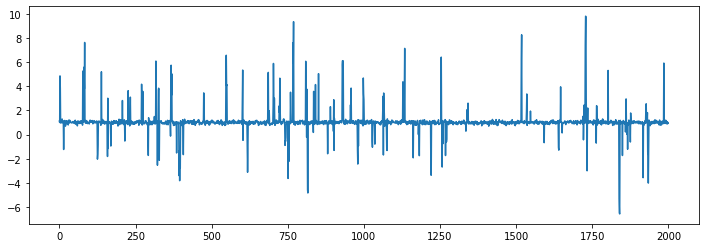

In [7]:
X_true = gen_sample_1(N=N, sigma=0.1)
X_sig  = X_true + gen_outliers(X_true, N=N_anom, sigma=2, max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample1.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

# Sample 2

In [8]:
def gen_sample_2(N, sigma=0.1):
    Z = np.arange(N)
    X = 0.01 * Z + np.ones(N) + np.random.normal(0, sigma, N)
    return X

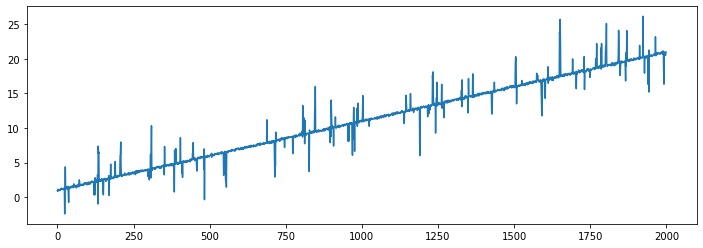

In [9]:
X_true = gen_sample_2(N=N, sigma=0.1)
X_sig  = X_true + gen_outliers(X_true, N=N_anom, sigma=2, max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample2.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

# Sample 3

In [10]:
def gen_sample_3(N, sigma=0.1):
    Z = np.arange(N)
    X = np.sin(0.1 * Z) + np.ones(N) + np.random.normal(0, sigma, N)
    return X

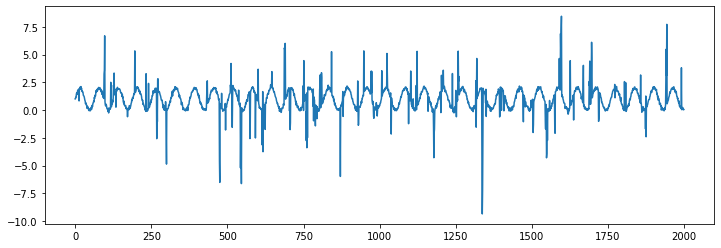

In [11]:
X_true = gen_sample_3(N=N, sigma=0.1)
X_sig  = X_true + gen_outliers(X_true, N=N_anom, sigma=2, max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample3.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

# Sample 4

In [12]:
def gen_sample_4(N, sigma=0.1):
    Z = np.arange(N)
    X = 0.01 * Z + np.sin(0.1 * Z) + np.ones(N) + np.random.normal(0, sigma, N)
    return X

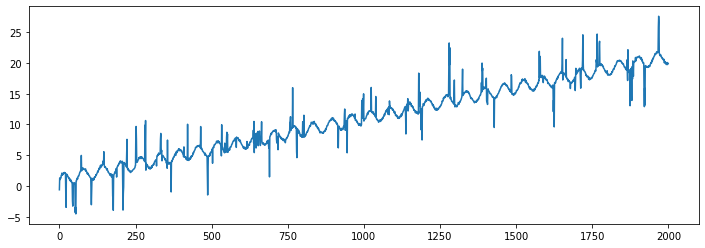

In [13]:
X_true = gen_sample_4(N=N, sigma=0.1)
X_sig  = X_true + gen_outliers(X_true, N=N_anom, sigma=2, max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample4.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

# Sample 5

In [14]:
def gen_sample_5(N, sigma=0.1):
    Z = np.arange(N)
    X = 0.01 * Z + np.sin(0.1 * Z) + np.sin(0.012 * Z) + np.ones(N) + np.random.normal(0, sigma, N)
    return X

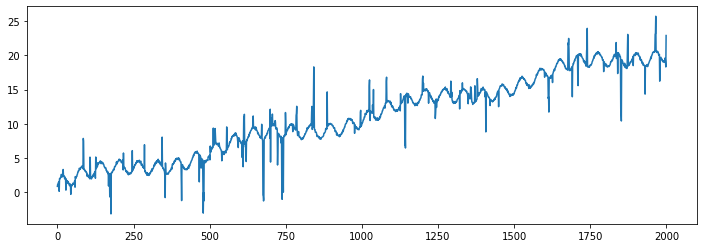

In [15]:
X_true = gen_sample_5(N=N, sigma=0.1)
X_sig  = X_true + gen_outliers(X_true, N=N_anom, sigma=2, max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample5.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

# Samples 6-9

https://archive.ics.uci.edu/ml/datasets/Air+quality

In [16]:
data = pd.read_excel("../data/AirQualityUCI/AirQualityUCI.xlsx", sep=';')
data.fillna(value=-200)
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [17]:
data.replace(to_replace={'CO(GT)': -200, 'T': -200, 'RH': -200, 'AH': -200, 'PT08.S1(CO)': -200}, 
             value={'CO(GT)': 0, 'T': data['T'].mean(), 'RH': data['RH'].mean(), 
                    'AH': data['AH'].mean(), 'PT08.S1(CO)': data['PT08.S1(CO)'].mean()}, 
             inplace=True)

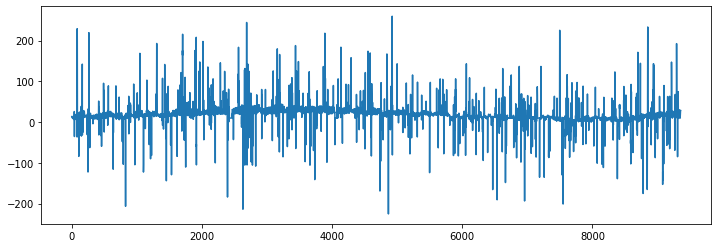

In [18]:
X_true = data['T'].values
X_sig  = X_true + gen_outliers(X_true, N=int(0.05 * len(X_true)), sigma=5*X_true.std(), max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample6.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

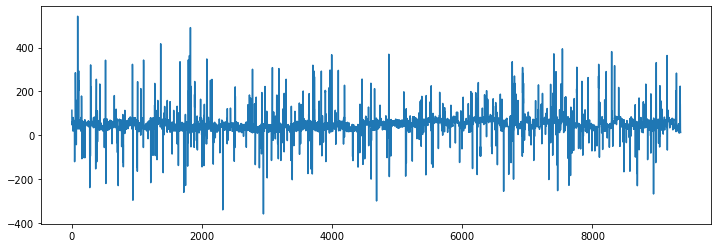

In [19]:
X_true = data['RH'].values
X_sig  = X_true + gen_outliers(X_true, N=int(0.05 * len(X_true)), sigma=5*X_true.std(), max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample7.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

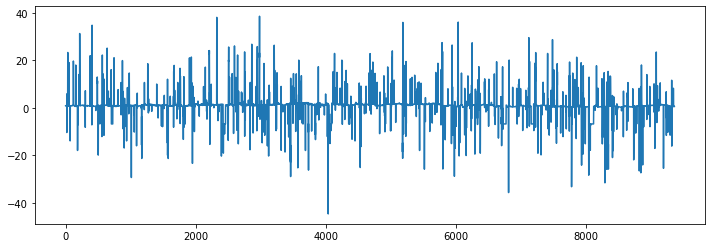

In [20]:
X_true = data['AH'].values
X_sig  = X_true + gen_outliers(X_true, N=int(0.05 * len(X_true)), sigma=5*X_true.std(), max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample8.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()

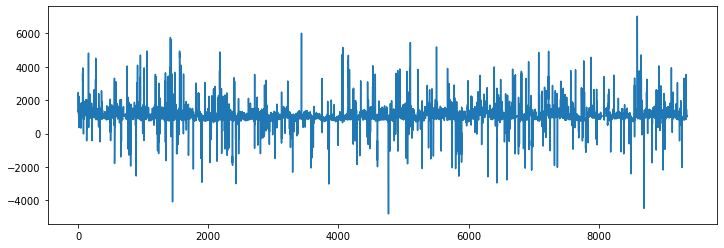

In [21]:
X_true = data['PT08.S1(CO)'].values
X_sig  = X_true + gen_outliers(X_true, N=int(0.05 * len(X_true)), sigma=5*X_true.std(), max_size=5)

df = pd.DataFrame()
df['X']     = X_sig
df['Truth'] = X_true
df.to_csv("../data/sample9.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(X_sig)
plt.show()